In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv("../../data/NaIrate_20220412.csv") #Change to match local file name/location

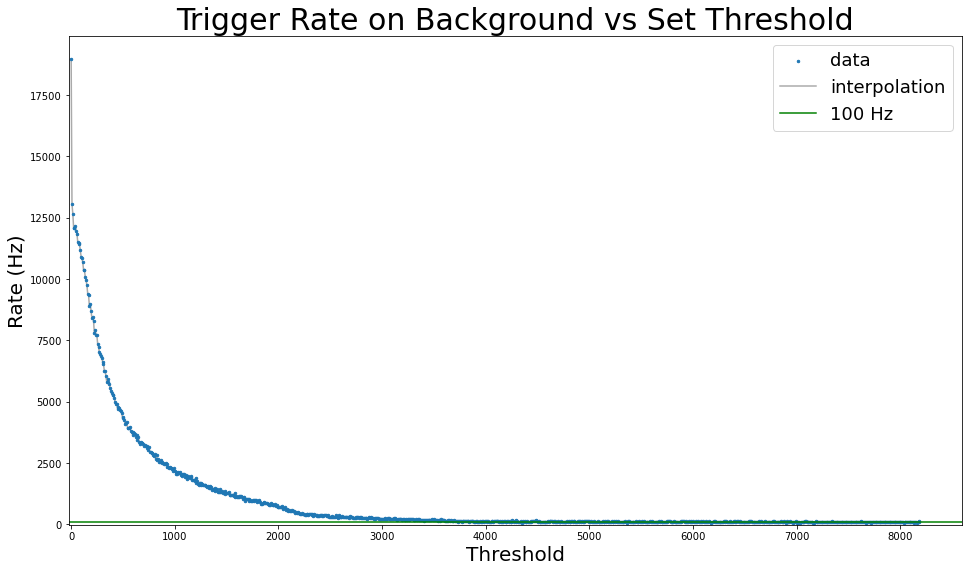

In [2]:
plt.figure(figsize=(16,9))

plt.scatter(data.iloc[:,0],data.iloc[:,1],s=6,label="data")
plt.plot(data.iloc[:,0],data.iloc[:,1],label="interpolation",zorder=0,color="#AAAAAA")
plt.axhline(100,color="green",label="100 Hz")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Set Threshold",size=30)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.xlim(-20)
plt.ylim(-20)

plt.legend(fontsize=18)
plt.show()

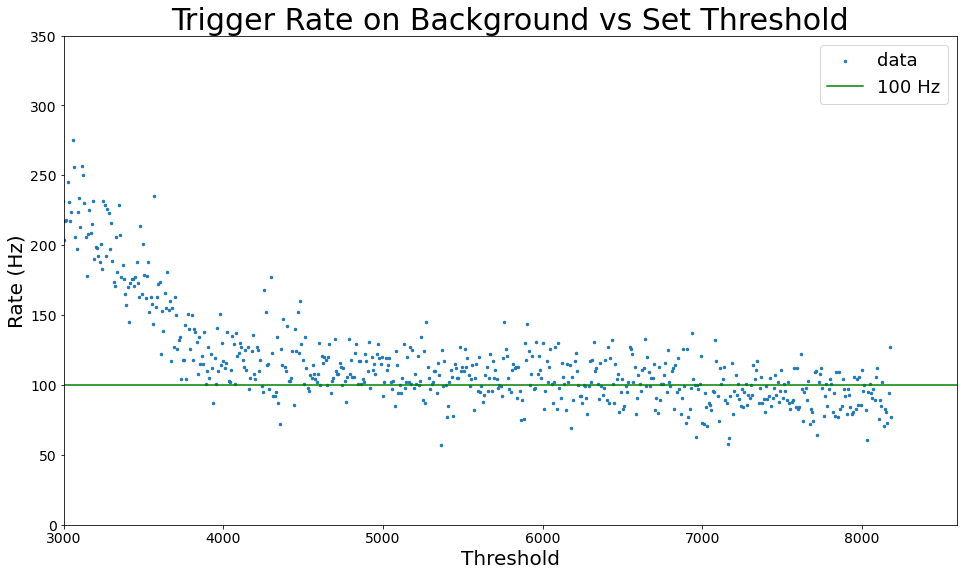

In [3]:
plt.figure(figsize=(16,9))

plt.scatter(data.iloc[:,0],data.iloc[:,1],s=6,label="data")
plt.axhline(100,color="green",label="100 Hz")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Set Threshold",size=30)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.xlim(3000)
plt.ylim(0,350)

plt.legend(fontsize=18)
plt.show()

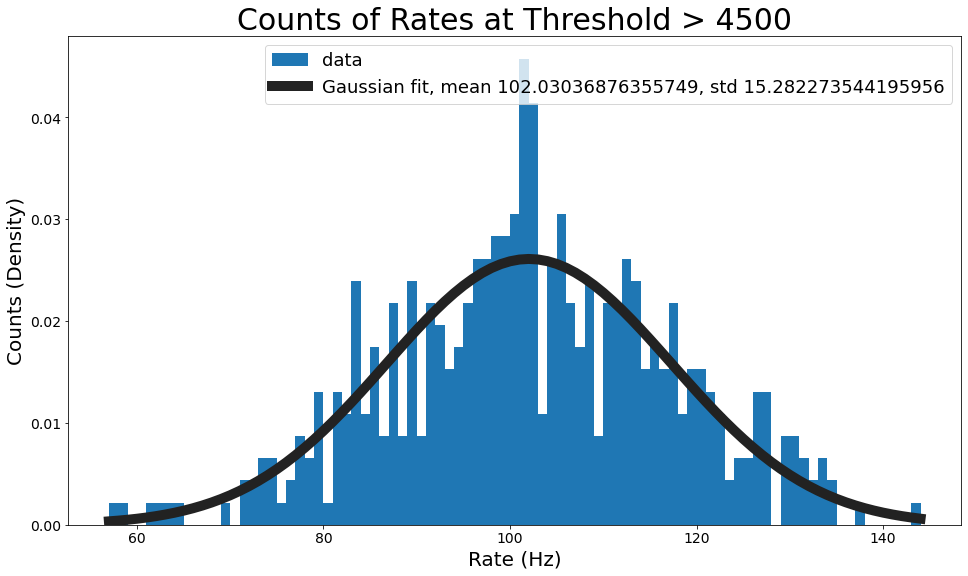

In [4]:
plt.figure(figsize=(16,9))

histdata = data.iloc[:,1][data.iloc[:,0]>4500]
bins = np.arange(histdata.min(),histdata.max())

mean,std = norm.fit(histdata)

plt.hist(histdata,bins=bins,density=True,label="data")
plt.plot(bins,norm.pdf(bins,mean,std),label="Gaussian fit, mean "+str(mean)+", std "+str(std),color="#222222",linewidth=10)

plt.title("Counts of Rates at Threshold > 4500",size=30)
plt.xlabel("Rate (Hz)",size=20)
plt.ylabel("Counts (Density)",size=20)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels

plt.legend(fontsize=18)
plt.show()

In [5]:
totalpoints = sum(histdata)
unpdf = lambda x: norm.pdf(x,mean,std)*totalpoints